In [3]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from empiricaldist import Pmf

def manual_calculate_percentile(data, percentile):
    """
    Calculate the given percentile of a list of numbers manually.

    Parameters:
    data (list): The list of numbers.
    percentile (float): The percentile to calculate (between 0 and 100).

    Returns:
    float: The value at the given percentile.
    """
    # Sort the data
    sorted_data = sorted(data)

    # Calculate the index
    index = (percentile / 100) * (len(sorted_data) - 1)
    #index = percentile / 100 * (len(sorted_data) + 1) # This is the formula used most often when I looked into it.

    # If the index is an integer, return the value at this index
    if index.is_integer():
        return sorted_data[int(index)]
    else:
        # If the index is not an integer, interpolate between the two surrounding values
        lower_index = int(index)
        upper_index = lower_index + 1
        interpolation_weight = index - lower_index
        return sorted_data[lower_index] + interpolation_weight * (sorted_data[upper_index] - sorted_data[lower_index])

def manual_calculate_percentile_given_score(data, score):
    """
    Calculate the percentile of a given score manually.

    Parameters:
    data (list): The list of numbers.
    score (float): The score to calculate the percentile of.

    Returns:
    float: The percentile of the given score.
    """
    # Sort the data
    sorted_data = sorted(data)

    # Calculate the index
    index = sorted_data.index(score)

    # Calculate the percentile
    # Percentile = (number of values below score) ÷ (total number of scores) x 100

    # or
    percentile = (index / len(sorted_data)) * 100

    return percentile


test_scores2 = [67, 70, 75, 76, 77, 78, 80, 83, 85, 87, 88, 89, 90, 93, 95]

percentile = manual_calculate_percentile_given_score(test_scores2, 88)
print(f'88 is in the following percentile: {percentile}.')

value = manual_calculate_percentile(test_scores2, percentile)
print(f'The value at the {percentile} percentile is {value}.')

# Sample data: 60 test scores with some repeated values
test_scores = np.random.choice(range(50, 101), size=60, replace=True)

# Calculating basic statistics
mean_score = np.mean(test_scores)
median_score = np.median(test_scores)
mode_score = Counter(test_scores).most_common(1)[0][0]  # Most common value

# Calculating quartiles
first_quartile = np.percentile(test_scores, 25)
third_quartile = np.percentile(test_scores, 75)

# Calculating a specific percentile, e.g., the 90th percentile
ninety_percentile = np.percentile(test_scores, 90)

# Creating a Probability Mass Function (PMF)
value_counts = Counter(test_scores)
value_counts
total_count = len(test_scores)

# Output the results
basic_statistics_man = {
    "Mean": mean_score,
    "Median": median_score,
    "Mode": mode_score,
    "1st Quartile": first_quartile,
    "3rd Quartile": third_quartile,
    "90th Percentile": ninety_percentile
}

basic_statistics_man, pmf_manual


88 is in the following percentile: 66.66666666666666.
The value at the 66.66666666666666 percentile is 87.33333333333333.


NameError: name 'pmf_manual' is not defined

In [12]:
def quantile_manual(pmf, percentile):
    """
    Given a pmf, computes the value that corresponds to the given percentile.
    """
    total = 0
    for q, p in pmf.items():
        total += p
        if total >= percentile:
            return q
    return np.nan

# Sample data: 60 test scores with some repeated values
test_scores = np.random.choice(range(50, 101), size=60, replace=True)


pmf_emperical = Pmf.from_seq(test_scores) 
pmf_manual = {k: v / total_count for k, v in value_counts.items()}

# Compute the percentile rank of a given test score using PMF library
print(test_scores)
print(pmf_emperical.quantile(0.6))
print(f'The test score at the 60th percentile: {quantile_manual(pmf_emperical, 0.6)}')  # return the test score at the given percentile rank
print(f'A score of 82% puts you in the {pmf_emperical.prob_le(82) * 100}th percentile') # return the percentile rank of a given test score



[ 95  86  72  86  96  67  85  92  58  72  65  51  56  98  81  83  98  59
  68  80  84  84  55  77  68  62  94  69 100  65  69  86  85  66  84  92
  50  74  56  65  97  85  98  77 100  63  90  69  86  70  70  92  59  96
  61  85  64  77  75  53]
84.0
The test score at the 60th percentile: 84
A score of 82% puts you in the 56.66666666666668th percentile


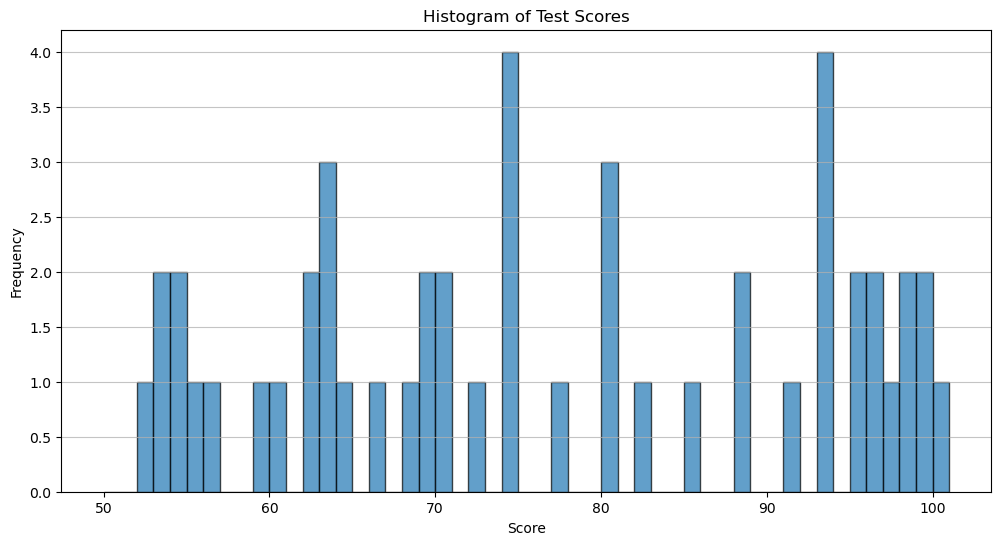

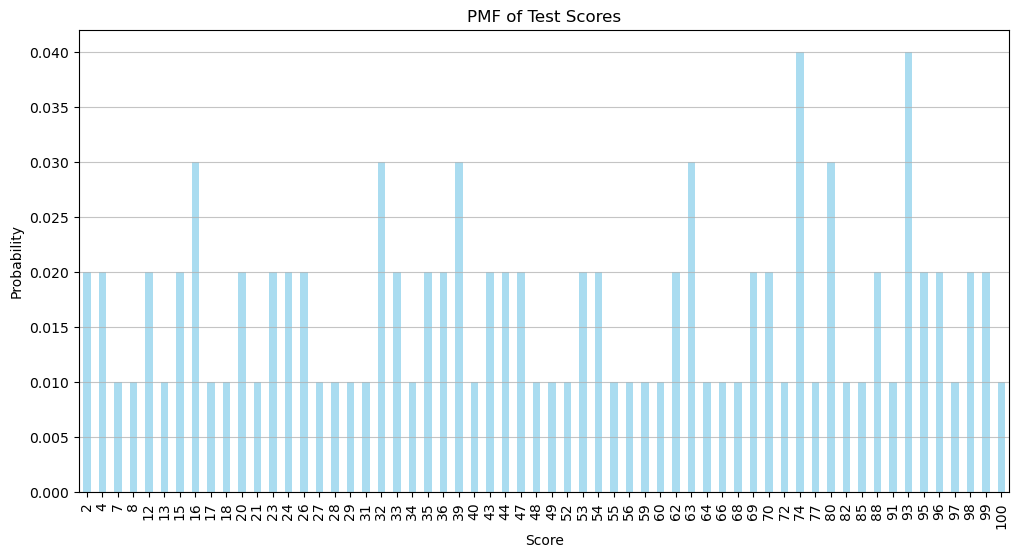

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from empiricaldist import Pmf

# Sample data: a list of numbers (e.g., test scores)
data = np.random.choice(range(0, 101), size=100, replace=True)

# Creating a histogram
plt.figure(figsize=(12, 6))
plt.hist(data, bins=range(50, 102), edgecolor='black', alpha=0.7)
plt.title('Histogram of Test Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Creating a PMF
pmf = Pmf.from_seq(data)

# Plotting the PMF
plt.figure(figsize=(12, 6))
pmf.plot(kind='bar', color='skyblue', alpha=0.7)
plt.title('PMF of Test Scores')
plt.xlabel('Score')
plt.ylabel('Probability')
plt.grid(axis='y', alpha=0.75)
plt.show()


0      1
1      1
2      1
3      1
4      1
      ..
96     1
97     1
98     1
99     1
100    1
Length: 101, dtype: int64


,probs
0,0.009901
1,0.009901
2,0.009901
3,0.009901
4,0.009901
...,...
96,0.009901
97,0.009901
98,0.009901
99,0.009901


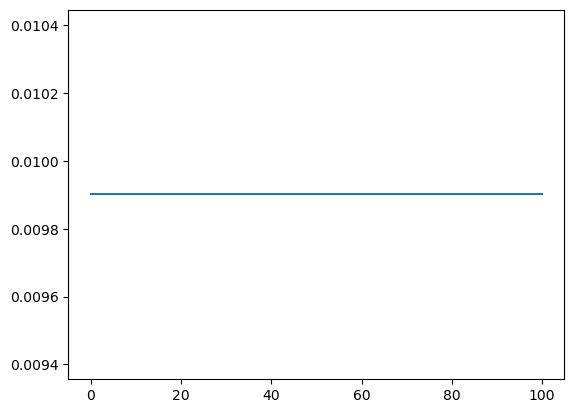

In [19]:
import numpy as np

hypos = np.arange(101)
prior = Pmf(1, hypos)
print(prior)
prior.normalize()
prior.plot()

prior
